## Week 6. Neural Nets and backpropagation

In this session we will continue the work we started on neural networks. In particular, in this exercise, you will get to code a neural network from scratch and will be asked to understand and code backpropagation to train the network 

<img src="NNbrainIMage.png" alt="Drawing" style="width: 400px;"/>

image credit:  [https://appen.com](https://appen.com) 

__Exercise 1.__ Let us go back briefly to a simple dataset to make sure we understand how things work. As a first exercise, we will code a one hidden layer neural network that outputs a binary 0/1 variable indicating the class of our data. Throughout this exercise, we will use the notation $z^{\ell+1} = \sigma(a^{\ell+1})$ to denote the output of any neuron from the $(\ell+1)^{th}$ layer and where $a^{\ell+1} = \sum_{k} w_{\ell+1,k} z_k$ is the combination from the previous layer that is fed to the neuron.  

<img src="SingleHiddenLayerNeuralNet.png" alt="Drawing" style="width: 400px;"/>

image credit:  [MaviccPRP@web.studio](https://maviccprp.github.io) 

We will use the function ['minimize'](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) from scipy. Check the documentation of that function. We will set the 'jac' parameter of the optimizer to 'True', which implies that the (objective) function that we provide as an input should return both the value of the loss and the value of its gradient. 

For this first exercise, you are asked to write a function $f(W)$ wich takes as arguments a vector $W$ containing all the parameters of your network (as a first step consider building a network with only a few hidden units, in order to make sure the model is working). As indicated above, the function should return (1) the value of the binary cross entropy for the given set of weights and (2) the value of the gradient derived through Backpropagation (as we set the value of 'jac' to True). 

 We will split the writing of your function into several steps. Once you have coded each step, you should gather them together in a single $fun(W)$ body that you will then pass as input to the minimize function. 

__Exercise 1.a.__ Start Load the data using the lines below and plot it using scatter( )

In [5]:
# lab 6
from scipy.optimize import minimize
import scipy.io as sio
import numpy as np

data1 = sio.loadmat("pointsClass1Week6.mat")
data2 = sio.loadmat("pointsClass2Week6.mat")

from numpy import linalg as LA

data1 = data1["pointsClass1Week6"]
data2 = data2["pointsClass2Week6"]

__Exercise 1.b__ As indicated above, we want to apply the network to the simple binary dataset that you loaded above. We want to build an architecture similar to the one shown above, except that, since we only consider a 2D dataset, we only need 2 inputs. we want our activation function to be all sigmoid. Start by defining the function sigmoid and the gradient of this function. Once you are done, check your derivative. Also make sure you can compute the entrywise sigmoid on any numpy array if the input to your function is a numpy array. 

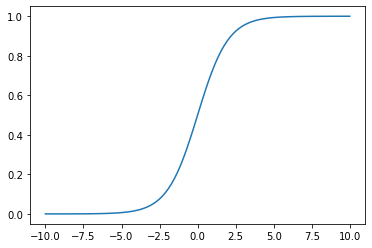

In [6]:
import matplotlib.pyplot as plt

def sigmoid(x):
    # takes input vector and returns the vector (sigma(x1), sigma(x2), ..., sigma(xn))
    # also returns derivative of sigmoid (sigma * (1 - sigma))
    
    sigmoid = np.divide(1, 1 + np.exp(-x))
    return sigmoid, np.multiply(sigmoid, (1 - sigmoid))


x = np.linspace(-10, 10, 100)


plt.plot(x, sigmoid(x)[0])
plt.show()

__Exercise 1.c__ Now that we have the sigmoid and its gradient, we will code the loss. As you might remember from previous labs, the MLPClassifier from scikit-learn optimizes the 'log-loss function' (a.k.a Binary cross entropy) which reads for a set of $N$ prototypes $x_i$ with binary $0/1$ targets, 

$$−\frac{1}{N}\sum_{i=1}^N (y_i \log(p_{W}(x_i))+(1−y_i)\log(1−p_{W}(x_i))) $$

Here the probability $p_{W}(x_i)$ is the output of your network. Instead of minimizing this function directly, we will consider its $\ell_2$ regularized version

$$−\frac{1}{N}\sum_{i=1}^N (y_i \log(p_{W}(x_i))+(1−y_i)\log(1−p_{W}(x_i)))  + \lambda \sum_{j\in\text{weights}\setminus \text{bias}} W^2_j$$

Where the $W_j$ encode the weights. Code that function for a given labeled dataset $X,t$ such as given above, a set of weights stored in the vector $W$ (you can use a list or a dictionnary if you want but ultimately, you will need to store them in a numpy vector for use with the optimization routine).  Note that one typically does not regularize the bias terms. 

In [ ]:

# returns loss value and gradient
# inputs: training point x and targets t
#         initial weight vector
#         alpha is the regularization parameter
#         network_size, network_size(k) = num neurons in layer k
#
# return: value of binary cross entropy loss
#         value of gradient

def binaryCrossEntropy(x, t, W, alpha, networkSize):
    # step 1: forward propagation
    NUM_LAYERS = len(networkSize)
    
    inputsPreviousLayer = len(x)
    currentNumNuerons = networkSize[0]
    W0 = W[0:currentNumNeurons * (inputsPreviousLayer + 1)] # + 1 for the intercepts
    
    xTilde = np.vstack((1, x.reshape(-1, 1)))
    W0Matrix = np.reshape(W0, (currentNumNeurons, inputsPreviousLayer + 1))
    
    # preactivation
    a = np.matmul(xTilde, W0Matrix)
    # postactivation
    z = sigmoid(a)[0]
    
    counter = currentNumNeurons * (inputsPreviousLayer + 1)
    
    aTotal = np.zeros((np.sum(networkSize), 1))
    zTotal = np.zeros((np.sum(networkSize[1 :])sum(networkSize), 1))
    
    aTotal[0:networkSize[0]] = a
    zTotal[0:networkSize[0]] = z
    
    counter2 = networkSize[0]
    
    for nn in range(1, NUM_LAYERS):
    
        inputsPreviousLayer = len(z)
        currentNumNuerons = networkSize[nn]
        WL = W[counter:counter + currentNumNeurons * (inputsPreviousLayer + 1)] # + 1 for the intercepts
        counter += currentNumNeurons * (inputsPreviousLayer + 1)
        
        zTilde = np.vstack((1, z.reshape(-1, 1)))
        WLMatrix = np.reshape(WL, (currentNumNeurons, inputsPreviousLayer + 1))

        # preactivation
        a = np.matmul(zTilde, WLMatrix)
        # postactivation
        z = sigmoid(a)[0]
        
        aTotal[counter2: counter2 + networkSize[nn]] = a
        zTotal[counter2: counter2 + networkSize[nn]] = z
        
        counter2 += networkSize[nn]
    
    binaryCrossEntropy = -(t * np.log(z) + (1 - t) * np.log(1 - z))
    
    zOut = z
    
    # step 2: backward propagation
    deltaOut = zOut - target
    
    numNueronsL = networSize[-1]
    numNueronsLMinus1 = networSize[-2]
    WeightLastLayer = W[-(numNeuronsL * (numNeuronsLMinus1 + 1)):]
    np.reshape(WeightLastLayer, (numberNeuronsLMinus1, numNueronsL))
    
    # backdrop delta
    
    tmp = np.matmul(WightLastLayer.T, deltaOut)
    
    current_ai = aTotal[-networkSize[-1] - networkSize[-2] : -networkSize[-1]]
    current_zi = zTotal[-networkSize[-1] - networkSize[-2] : -networkSize[-1]]
    
    sigmaPrime_ai = sigmoid(a)[1]
    
    deltaL = np.multiply(tmp, sigmoid(a)[1])
    
    counter4 = -(numNeuronsL * (numNeuronsLMinus1 + 1))
    counter5 = networkSize[-1]-networkSize[-2]
    
    dL_dwout = np.matmul(deltaL.reshape(-1, 1), current_zi.reshape(-1, 1).T)
    
    for nn in range(1, NUM_LAYERS):
        numNueronsL = networSize[-nn-1]
        numNueronsLMinus1 = networSize[-nn-2]
        WeightLastLayer = W[-(numNeuronsL * (numNeuronsLMinus1 + 1)) + counter4 : counter4]
        np.reshape(WeightLastLayer, (numberNeuronsLMinus1, numNueronsL))

        # backdrop delta

        tmp = np.matmul(WightLastLayer.T, deltaOut)

        current_ai = aTotal[-counter5 - networkSize[-nn-2] : -counter5]
        current_zi = zTotal[-counter5 - networkSize[-nn-2] : -counter5]

        sigmaPrime_ai = sigmoid(a)[1]

        deltaL = np.multiply(tmp, sigmoid(a)[1])
        
        counter4 += -(numNeuronsL * (numNeuronsLMinus1 + 1))
        counter5 += network_size[-nn-2]
        
    
    # return binaryCrossEntropy, gradient
    
    

__Exercise 1.d. Towards Backpropagation.__ The example above is relatively simple so that backpropagation is not really needed. Compute the gradient of the Binary cross entropy loss with respect to the weights.  